In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
#import seaborn as sns
import os
import geopandas as gpd
import geoplot
import mapclassify
from tensorflow.keras.utils import get_file

In [20]:
df_mob = pd.read_csv('./data/Global_Mobility_Report.csv')
df_mob['date-dt'] = pd.to_datetime(df_mob['date'])

In [21]:
df_mob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588539 entries, 0 to 588538
Data columns (total 14 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 587527 non-null  object        
 1   country_region                                      588539 non-null  object        
 2   sub_region_1                                        570989 non-null  object        
 3   sub_region_2                                        340022 non-null  object        
 4   iso_3166_2_code                                     213550 non-null  object        
 5   census_fips_code                                    340152 non-null  float64       
 6   date                                                588539 non-null  object        
 7   retail_and_recreation_percent_change_from_baseline  451940 non-null  float64       

In [22]:
df_mob['country_region'].unique()

array(['United Arab Emirates', 'Afghanistan', 'Antigua and Barbuda',
       'Angola', 'Argentina', 'Austria', 'Australia', 'Aruba',
       'Bosnia and Herzegovina', 'Barbados', 'Bangladesh', 'Belgium',
       'Burkina Faso', 'Bulgaria', 'Bahrain', 'Benin', 'Bolivia',
       'Brazil', 'The Bahamas', 'Botswana', 'Belarus', 'Belize', 'Canada',
       'Switzerland', "Côte d'Ivoire", 'Chile', 'Cameroon', 'Colombia',
       'Costa Rica', 'Cape Verde', 'Czechia', 'Germany', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Estonia', 'Egypt', 'Spain',
       'Finland', 'Fiji', 'France', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Greece', 'Guatemala', 'Guinea-Bissau', 'Hong Kong',
       'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'Ireland',
       'Israel', 'India', 'Iraq', 'Italy', 'Jamaica', 'Jordan', 'Japan',
       'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait',
       'Kazakhstan', 'Laos', 'Lebanon', 'Liechtenstein', 'Sri Lanka',
       'Lithuania', '

In [23]:
fltr = df_mob['country_region'] == 'Brazil'
br_mob = df_mob.loc[fltr, :]

In [24]:
fltr = br_mob['sub_region_1'] == 'State of Bahia'
ba_mob = br_mob.loc[fltr, :]

In [25]:
ba_mob['sub_region_2'].count()

0

In [26]:
br_mob .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 16471 to 20110
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 3640 non-null   object        
 1   country_region                                      3640 non-null   object        
 2   sub_region_1                                        3510 non-null   object        
 3   sub_region_2                                        0 non-null      object        
 4   iso_3166_2_code                                     3510 non-null   object        
 5   census_fips_code                                    0 non-null      float64       
 6   date                                                3640 non-null   object        
 7   retail_and_recreation_percent_change_from_baseline  3640 non-null   float64       
 8   gro

In [27]:
ba_mob.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 17251 to 17380
Data columns (total 14 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 130 non-null    object        
 1   country_region                                      130 non-null    object        
 2   sub_region_1                                        130 non-null    object        
 3   sub_region_2                                        0 non-null      object        
 4   iso_3166_2_code                                     130 non-null    object        
 5   census_fips_code                                    0 non-null      float64       
 6   date                                                130 non-null    object        
 7   retail_and_recreation_percent_change_from_baseline  130 non-null    float64       
 8   groc

In [28]:
ba_mob['iso_3166_2_code'].unique()

array(['BR-BA'], dtype=object)

In [29]:
ba_mob['date'].max()

'2020-06-23'

In [30]:
ba_mob['date'].min()

'2020-02-15'

In [31]:
ba_mob.describe()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,NaN,-44.838462,-15.015385,-44.538462,-45.615385,-22.207692,12.630769
std,NaN,23.251174,13.486131,22.913100,25.204092,19.885991,6.479710
min,NaN,-79.000000,-56.000000,-72.000000,-76.000000,-69.000000,0.000000
25%,NaN,-60.000000,-24.000000,-58.750000,-63.000000,-34.000000,8.250000
50%,NaN,-53.000000,-13.000000,-51.500000,-56.000000,-27.000000,15.000000
75%,NaN,-27.750000,-3.000000,-35.500000,-30.000000,-11.500000,17.000000
max,NaN,5.000000,8.000000,58.000000,6.000000,18.000000,23.000000


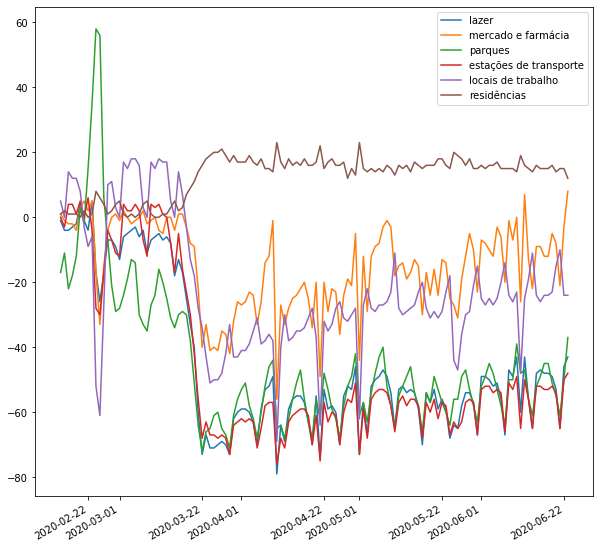

In [50]:
fig = plt.figure(1, figsize=(10,10))
plt.plot(ba_mob['date-dt'] , ba_mob['retail_and_recreation_percent_change_from_baseline'], label ='lazer' )
plt.plot(ba_mob['date-dt'] , ba_mob['grocery_and_pharmacy_percent_change_from_baseline'], label= 'mercado e farmácia' )
plt.plot(ba_mob['date-dt'] , ba_mob['parks_percent_change_from_baseline'] , label='parques')
plt.plot(ba_mob['date-dt'] , ba_mob['transit_stations_percent_change_from_baseline'], label = 'estações de transporte')
plt.plot(ba_mob['date-dt'] , ba_mob['workplaces_percent_change_from_baseline'], label = 'locais de trabalho' )
plt.plot(ba_mob['date-dt'] , ba_mob['residential_percent_change_from_baseline'], label = 'residências' )
fig.autofmt_xdate()
plt.legend()
plt.savefig(fname = 'google_mob_teste.png', format ='png')
plt.show(1)

(array([737477., 737485., 737506., 737516., 737537., 737546., 737567.,
        737577., 737598.]),
 <a list of 9 Text xticklabel objects>)

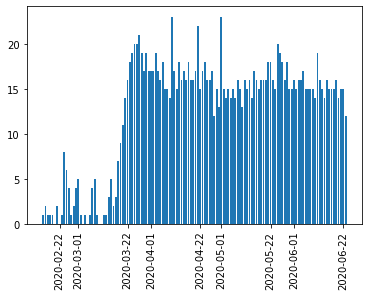

In [48]:
plt.bar(ba_mob['date-dt'] , ba_mob['residential_percent_change_from_baseline'], label = 'residências' )
plt.xticks(rotation=90)